In [1]:
import glob
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord 
import astropy.units as u
import matplotlib.pyplot as plt 
from astropy.visualization import ZScaleInterval
from photutils.aperture import CircularAperture
import numpy as np
from RetrieveSource import *

id = 40415
segment = 1
extension = 1
filter ='um2'
# Change where SWIFT data is stored
file_location = "/home/bethany/Desktop/Swift_Astrometry"

# Below is automatic.
labels = ['RAhr','DEdeg','Umag','e_Umag','Bmag','e_Bmag','Vmag','e_Vmag','Imag','e_Imag','Flag','Jmag','e_Jmag','Hmag','e_Hmag','Ksmag','e_Ksmag']

def get_file(id,segment=1,extension=1,filter='um2'):
    fname = glob.glob(f"{file_location}/SMC/sw000{id}00{segment}{filter}_sk_{id}_{segment}_{extension}.new")
    cname = glob.glob(f"{file_location}/SMC/sw000{id}00{segment}{filter}_sk_{id}_{segment}_{extension}.full.dat")
    HDR = fits.open(fname[0])
    CAT = pd.read_csv(cname[0],delimiter='\s+',names=labels)
    return HDR[0],CAT

def plot_file(id,segment=1,extension=1,filter='um2',xdim=None,ydim=None):
    Z = ZScaleInterval()
    data = get_file(id,segment=1,extension=1,filter='um2')[0].data
    if xdim == None:
        vmin,vmax = Z.get_limits(data)
    else:
        vmin,vmax = Z.get_limits(data[ydim[0]:ydim[1],xdim[0]:xdim[1]])
    f= plt.figure(figsize=(10,10))
    plt.imshow(data,origin='lower',vmin=vmin,vmax=vmax)
    plt.xlim(xdim)
    plt.ylim(ydim)

In [2]:
df = pd.read_csv('smc_anti_match_USNO_inf.dat',delimiter='\s+')

(array([6.000e+00, 1.500e+01, 1.410e+02, 3.620e+02, 7.800e+02, 1.879e+03,
        3.950e+03, 6.617e+03, 4.315e+03, 5.280e+02]),
 array([ 6.845 ,  8.0597,  9.2744, 10.4891, 11.7038, 12.9185, 14.1332,
        15.3479, 16.5626, 17.7773, 18.992 ]),
 <a list of 10 Patch objects>)

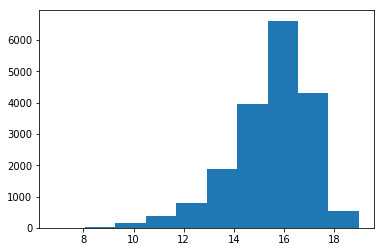

In [3]:
plt.hist(df['Bmag'][np.isfinite(df['Bmag'])])

In [4]:
ux,uy = SkyCoord(df['RAJ2000'],df['DEJ2000'],unit=(u.deg)).to_pixel(WCS(get_file(40415)[0].header))
mx,my = SkyCoord(get_file(40415)[1]['RAhr'] * 15,get_file(40415)[1]['DEdeg'],unit=(u.deg)).to_pixel(WCS(get_file(40415)[0].header))

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 55466.000949 from DATE-OBS.
Set MJD-END to 55466.003194 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 55466.000949 from DATE-OBS.
Set MJD-END to 55466.003194 from DATE-END'. [astropy.wcs.wcs]


In [5]:
x,y= SkyCoord(15.321112,-72.291923,unit=(u.deg)).to_pixel(WCS(get_file(40415)[0]))

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 55466.000949 from DATE-OBS.
Set MJD-END to 55466.003194 from DATE-END'. [astropy.wcs.wcs]


(1000, 1040)

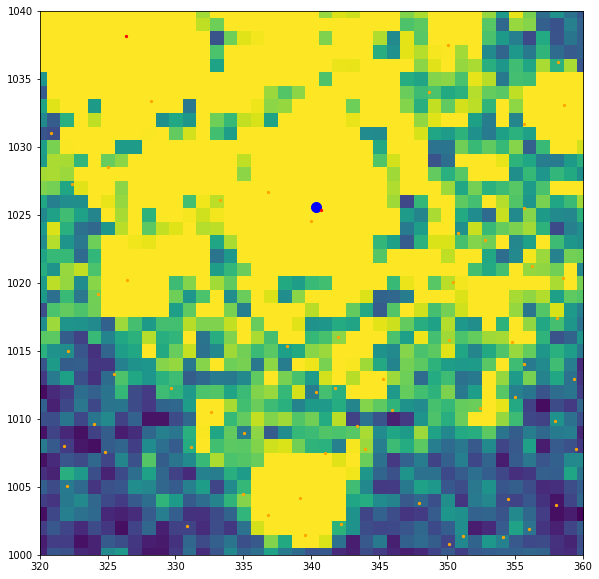

In [6]:
plot_file(40415,xdim=None,ydim=None)
plt.scatter(x,y,c='blue',s=100)
plt.scatter(ux,uy,c='r',s=5)
plt.scatter(mx,my,c='orange',s=5)

plt.xlim(320,360)
plt.ylim(1000,1040)

In [7]:
plot_file(45422,xdim=None,ydim=None)
plt.scatter(ux,uy,c='r')
plt.scatter(mx,my,c='black',s=1)
plt.xlim(600,800)
plt.ylim(800,1200)

IndexError: list index out of range

In [ ]:
plot_file(40416,xdim=[1000,1200],ydim=[400,800])

In [ ]:
plot_file(40417,xdim=[200,600],ydim=[200,600])

In [ ]:
plot_file(40419,xdim=[600,1000],ydim=[200,600])

In [ ]:
plot_file(40420,xdim=[1100,1300],ydim=[550,700])

In [ ]:
# for i in range(40424,40434,1):
#     print(i)
#     plot_file(i)

plot_file(40424,xdim=[400,900],ydim=[100,500])